In [1]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}") 

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [4]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

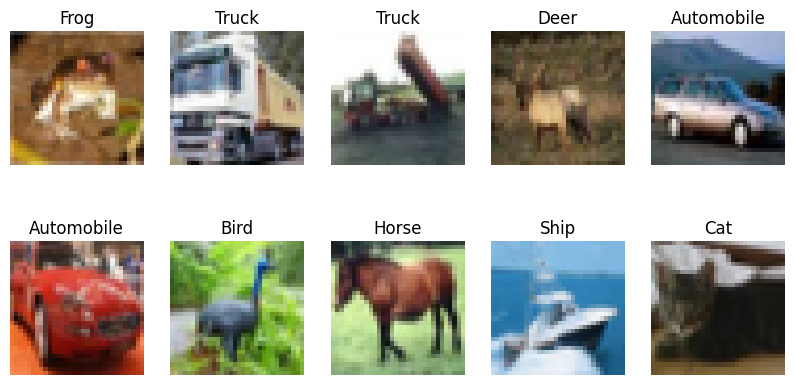

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
print(f"New label shape: {y_train.shape}")

New label shape: (50000, 10)


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])


C:\Users\Admin\anaconda3\envs\itcs-3162\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 36ms/step - accuracy: 0.2933 - loss: 1.9057 - val_accuracy: 0.4877 - val_loss: 1.4486
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.4881 - loss: 1.4301 - val_accuracy: 0.5807 - val_loss: 1.1982
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5527 - loss: 1.2612 - val_accuracy: 0.6157 - val_loss: 1.0930
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.5904 - loss: 1.1594 - val_accuracy: 0.6388 - val_loss: 1.0257
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 35ms/step - accuracy: 0.6150 - loss: 1.0878 - val_accuracy: 0.6553 - val_loss: 0.9862
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - accuracy: 0.6403 - loss: 1.0184 - val_accuracy: 0.6578 - val_loss: 0.9842
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.6580 - loss: 0.9722 - val_accuracy: 0.6760 - val_loss: 0.9322
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6718 - loss: 0.9345 - 

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6889 - loss: 0.9051
Test Accuracy: 0.6844
Test Loss: 0.9088


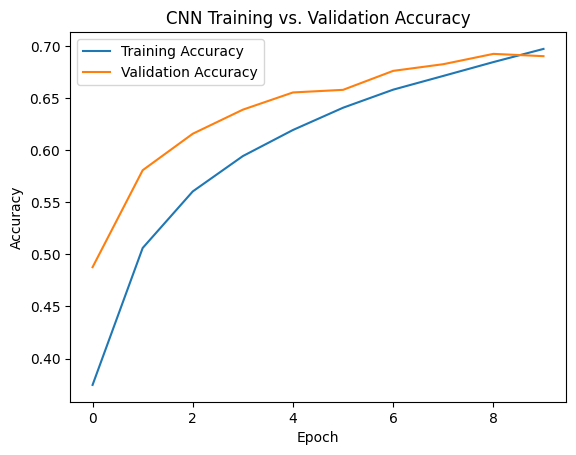

In [13]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("CNN Training vs. Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


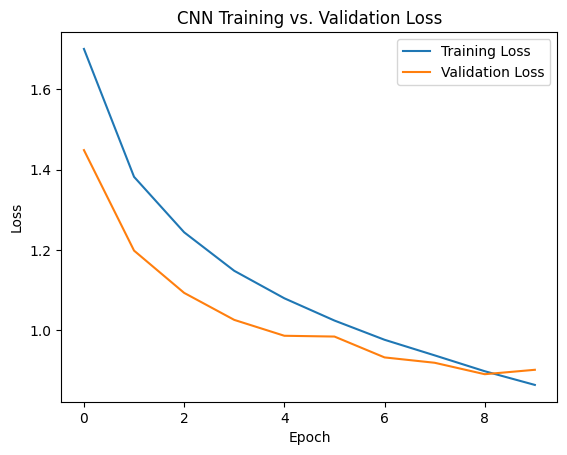

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("CNN Training vs. Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [16]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    Airplane       0.70      0.78      0.73      1000
  Automobile       0.80      0.81      0.81      1000
        Bird       0.57      0.59      0.58      1000
         Cat       0.47      0.55      0.51      1000
        Deer       0.73      0.51      0.60      1000
         Dog       0.58      0.60      0.59      1000
        Frog       0.76      0.73      0.75      1000
       Horse       0.76      0.72      0.74      1000
        Ship       0.73      0.84      0.78      1000
       Truck       0.81      0.73      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [17]:
cm = confusion_matrix(y_true, y_pred_classes)

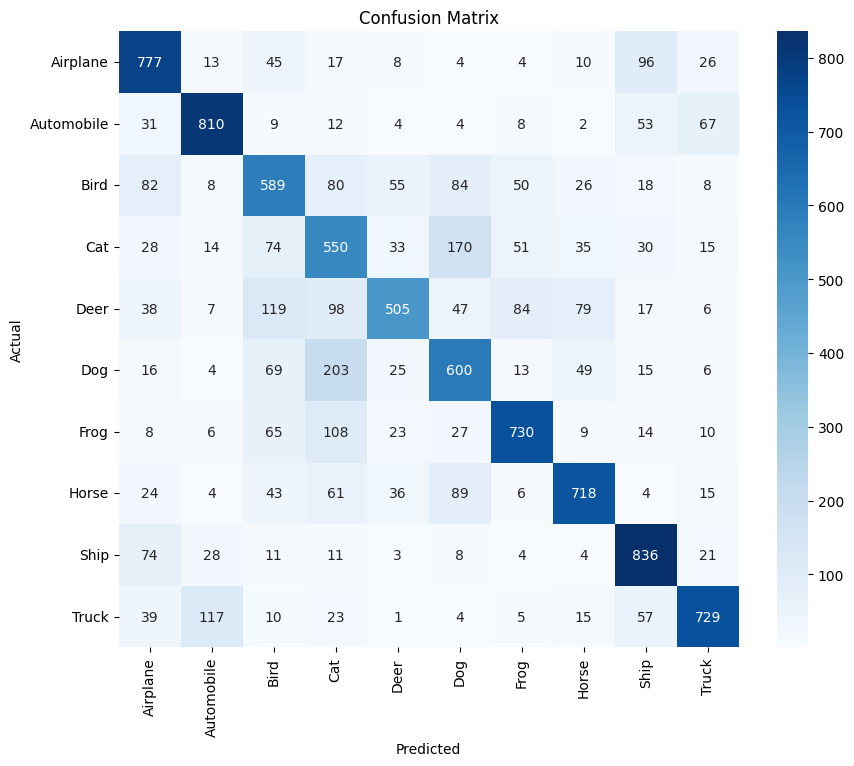

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

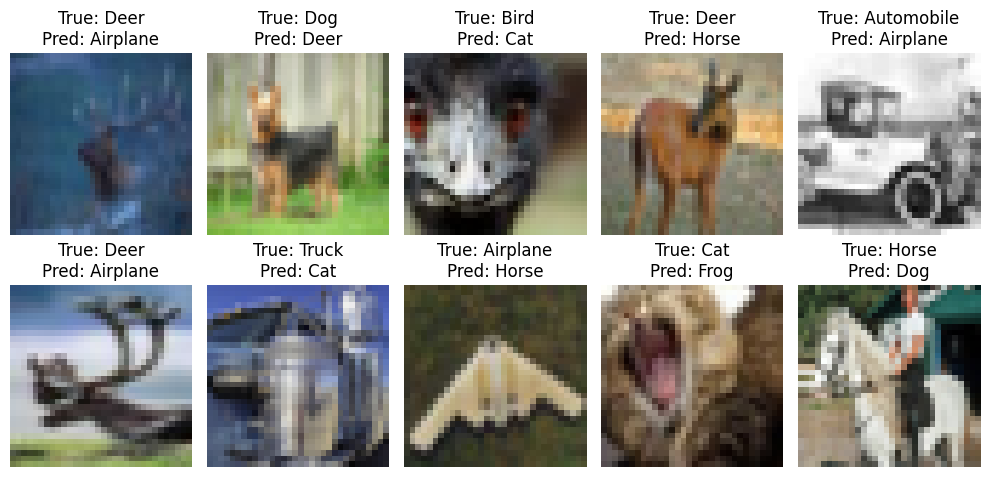

In [19]:
misclassified_indices = np.where(y_pred_classes != y_true)[0]
plt.figure(figsize=(10, 5))
for i in range(10):
    idx = misclassified_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
model.save("cnn_cifar10_model.h5")

In [21]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [22]:
base_model.trainable = False

In [23]:
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

In [24]:
model_vgg16 = Model(inputs=base_model.input, outputs=output)

In [25]:
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,781,642 (56.39 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history_cnn = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.7059 - loss: 0.8319 - val_accuracy: 0.6959 - val_loss: 0.8842
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7227 - loss: 0.7904 - val_accuracy: 0.6940 - val_loss: 0.8940
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.7325 - loss: 0.7597 - val_accuracy: 0.6947 - val_loss: 0.9076
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7340 - loss: 0.7503 - val_accuracy: 0.7122 - val_loss: 0.8645
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 29s 46ms/step - accuracy: 0.7464 - loss: 0.7090 - val_accuracy: 0.7097 - val_loss: 0.8843
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 43ms/step - accuracy: 0.7524 - loss: 0.6906 - val_accuracy: 0.7101 - val_loss: 0.8622
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 28s 44ms/step - accuracy: 0.7661 - loss: 0.6595 - val_accuracy: 0.7082 - val_loss: 0.9011
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.7654 - loss: 0.6539 - 

In [28]:
history_vgg16 = model_vgg16.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 467s 743ms/step - accuracy: 0.4281 - loss: 1.6315 - val_accuracy: 0.5435 - val_loss: 1.2996
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 442s 707ms/step - accuracy: 0.5766 - loss: 1.2304 - val_accuracy: 0.5794 - val_loss: 1.2024
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 481s 771ms/step - accuracy: 0.5997 - loss: 1.1527 - val_accuracy: 0.5796 - val_loss: 1.1905
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 485s 777ms/step - accuracy: 0.6055 - loss: 1.1189 - val_accuracy: 0.5938 - val_loss: 1.1689
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 563s 902ms/step - accuracy: 0.6207 - loss: 1.0858 - val_accuracy: 0.5998 - val_loss: 1.1537
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 490s 784ms/step - accuracy: 0.6296 - loss: 1.0613 - val_accuracy: 0.6051 - val_loss: 1.1464
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 384s 614ms/step - accuracy: 0.6412 - loss: 1.0262 - val_accuracy: 0.6006 - val_loss: 1.1440
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 394s 630ms/step - accuracy: 0.6471 -

In [29]:
test_loss_cnn, test_acc_cnn = model.evaluate(X_test, y_test)
print(f"Custom CNN Test Accuracy: {test_acc_cnn:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7141 - loss: 0.8764
Custom CNN Test Accuracy: 0.7145


In [30]:
test_loss_vgg16, test_acc_vgg16 = model_vgg16.evaluate(X_test, y_test)
print(f"VGG16 Test Accuracy: {test_acc_vgg16:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 78s 249ms/step - accuracy: 0.5964 - loss: 1.1310
VGG16 Test Accuracy: 0.5976


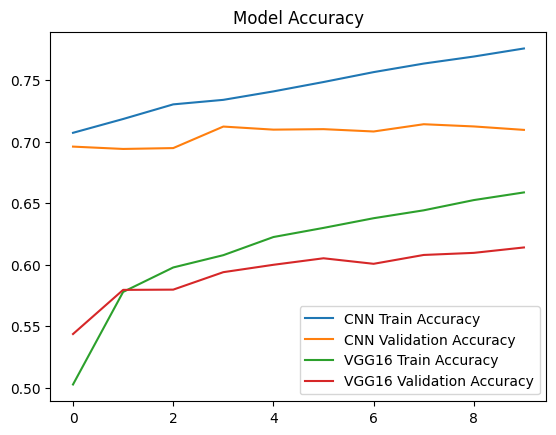

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='CNN Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.plot(history_vgg16.history['accuracy'], label='VGG16 Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='VGG16 Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [34]:
y_pred_cnn = np.argmax(model.predict(X_test), axis=1)
y_true_cnn = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


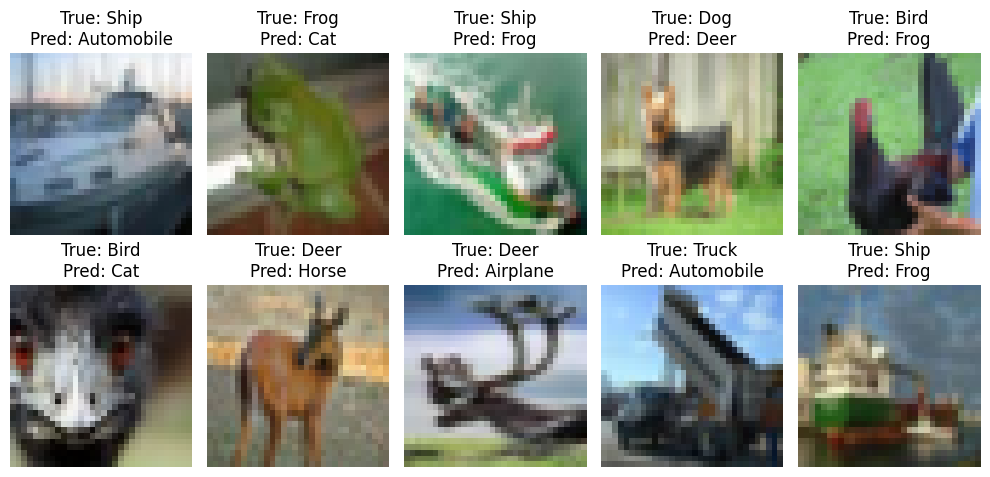

In [35]:
misclassified_indices = np.where(y_pred_cnn != y_true_cnn)[0]
plt.figure(figsize=(10, 5))
for i in range(10):  
    idx = misclassified_indices[i]
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"True: {class_names[y_true_cnn[idx]]}\nPred: {class_names[y_pred_cnn[idx]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [37]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

augmented_history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data=(X_test, y_test),
    epochs=10
)

Epoch 1/10


C:\Users\Admin\anaconda3\envs\itcs-3162\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 65ms/step - accuracy: 0.4902 - loss: 1.4672 - val_accuracy: 0.6607 - val_loss: 0.9822
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 72ms/step - accuracy: 0.5290 - loss: 1.3346 - val_accuracy: 0.6691 - val_loss: 0.9692
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.5441 - loss: 1.3037 - val_accuracy: 0.6777 - val_loss: 0.9388
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.5534 - loss: 1.2676 - val_accuracy: 0.6684 - val_loss: 0.9614
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.5586 - loss: 1.2557 - val_accuracy: 0.6562 - val_loss: 0.9927
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 54s 69ms/step - accuracy: 0.5685 - loss: 1.2265 - val_accuracy: 0.6437 - val_loss: 1.0167
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step - accuracy: 0.5750 - loss: 1.2078 - val_accuracy: 0.6808 - val_loss: 0.9209
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.5826 - loss: 1.1957 - val_accurac

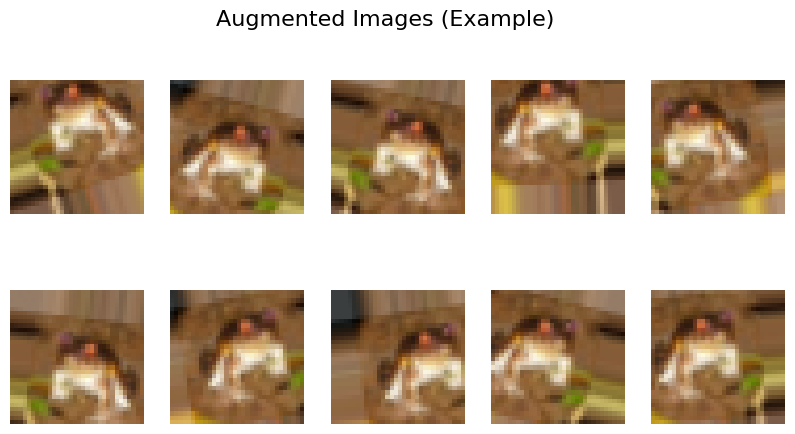

In [38]:
augmented_images = [datagen.random_transform(X_train[0]) for _ in range(10)]

plt.figure(figsize=(10, 5))
for i, img in enumerate(augmented_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Augmented Images (Example)", fontsize=16)
plt.show()